In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'1.15.0'

In [5]:
sys.path.append("../../../Scripts/")

In [6]:
import utils as global_utils
import adversarial as adv

In [7]:
n_channels = 3
n_window_length = 128

In [42]:
# load the dataset
uci_data_file_1 = "../transferability/final datasets/Uci_Body_Acc_Data.pickle"
uci_data_file_2 = "../Processed data/uci_body_acc_dataset.pickle"

mh_chest_data_file_1 = "../transferability/final datasets/mHealth_chest_128_50.pickle"
mh_ankle_data_file_1 = "../transferability/final datasets/mHealth_left_ankle_128_50.pickle"
mh_wrist_data_file_1 = "../transferability/final datasets/mHealth_right_wrist_128_50.pickle"

mh_chest_data_file_2 = "../Processed data/mHealth_chest_dataset.pickle"
mh_ankle_data_file_2 = "../Processed data/mHealth_ankle_dataset.pickle"
mh_wrist_data_file_3 = "../Processed data/mHealth_wrist_dataset.pickle"

adl_posture_data_file_1 = "../Processed data/adl_posture_dataset.pickle"
adl_posture_data_file_2 = "../Processed data/adl_posture_dataset_small.pickle"

adl_activity_data_file = "../Processed data/adl_activity_dataset_small.pickle"

In [272]:
name = "adl_activity"

In [273]:
f = open(adl_activity_data_file, "rb")
X, Y = pickle.load(f)
f.close()

n_classes = np.max(Y) + 1

In [274]:
X.shape, Y.shape, n_classes, global_utils.find_min_max(X)

((158510, 128, 3), (158510,), 11, (-1.0, 1.0000000000000004))

In [275]:
np.unique(Y, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([14410, 14410, 14410, 14410, 14410, 14410, 14410, 14410, 14410,
        14410, 14410], dtype=int64))

In [276]:
x_train, x_val, x_test, y_train, y_val, y_test = global_utils.split_into_train_val_test(X, Y)

Training set (106993, 128, 3) 
Test set (39628, 128, 3)
Validation set (11889, 128, 3)


In [277]:
global_utils.find_min_max(x_train)

(-1.0, 1.0000000000000004)

In [278]:
y_train_hot = global_utils.get_hot_labels(y_train)
y_val_hot = global_utils.get_hot_labels(y_val)
y_test_hot = global_utils.get_hot_labels(y_test)

In [279]:
BATCH_SIZE = 32
EPOCHS = 100
LR_RATE = 0.001

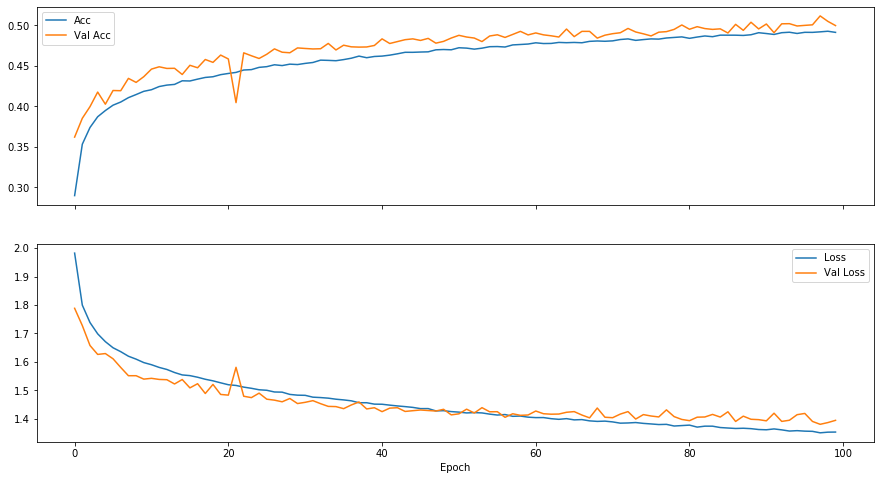

In [280]:
plot_loss = global_utils.PlotLosses()
callbacks = [plot_loss]
model = global_utils.get_cnn_model((n_window_length, n_channels), n_classes, LR_RATE)
history = model.fit(x_train, y_train_hot, batch_size = BATCH_SIZE, epochs=EPOCHS,
                   validation_data=(x_val, y_val_hot), verbose=0, callbacks=callbacks)

In [281]:
print("Loss, Accuracy")
print(model.evaluate(x_train, y_train_hot))
print(model.evaluate(x_test, y_test_hot))
print(model.evaluate(x_val, y_val_hot))

Loss, Accuracy
106993/106993 [==============================] - 8s 74us/sample - loss: 1.2434 - acc: 0.52500s - loss: 1.2444 - acc - ETA: 0s - loss: 1.2431 - acc: 0.52
[1.2433909905394356, 0.5249502]
39628/39628 [==============================] - 3s 77us/sample - loss: 1.3806 - acc: 0.50140s - loss: 1.3819 - acc: 0.
[1.380611869477114, 0.5013627]
11889/11889 [==============================] - 1s 73us/sample - loss: 1.3944 - acc: 0.4997
[1.3943886342888094, 0.4997056]


In [282]:
model_results_path = "../Results/texts/"+name+"_segment_model_results.txt"
f = open(model_results_path, "a")

f.write("Dataset, Loss, Accuracy \n")

l, a = model.evaluate(x_train, y_train_hot)
f.write("Training, {:.3f}, {:.3f}\n".format(l, a))

l, a = model.evaluate(x_test, y_test_hot)
f.write("Test, {:.3f}, {:.3f}\n".format(l, a))

l, a = model.evaluate(x_val, y_val_hot)
f.write("Validation, {:.3f}, {:.3f}\n".format(l, a))

f.close()

11889/11889 [==============================] - 1s 75us/sample - loss: 1.3944 - acc: 0.4997


In [283]:
model_save_path = "../Saved Model/"+name+"_segment_model.h5py"
print(model_save_path)
keras.models.save_model(model, model_save_path)

../Saved Model/adl_activity_segment_model.h5py


In [284]:
model.evaluate(X, keras.utils.to_categorical(Y, n_classes))

158510/158510 [==============================] - 12s 76us/sample - loss: 1.2890 - acc: 0.5172


[1.2890221797737833, 0.5171598]

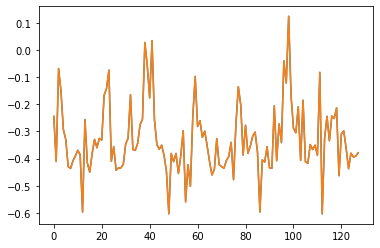

In [285]:
plt.plot(X[0, :, 0])
plt.plot(np.transpose(X, (0, 2, 1))[0, 0, :])